In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D,Dropout, MaxPool2D, Conv2DTranspose
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train/255).reshape(-1, 28,28,1) # 4 차원
x_test = (x_test/255).reshape(-1, 28,28,1)


def autoencoder(hidden_layer_size) :
    model = Sequential()
    model.add(Conv2D(filters=hidden_layer_size, kernel_size=(3,3), padding='same',
                                    input_shape=(28,28,1), activation='relu'))
#     model.add(Conv2D(filters=200, kernel_size=(3,3), padding='same', activation='relu'))
#     model.add(Conv2D(filters=500, kernel_size=(3,3), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=2))
    # model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(filters=1, kernel_size=(2,2), padding='same', activation='relu'))
    # model.add(Conv2DTranspose(filters=3, kernel_size=(25,25), padding='valid', activation='sigmoid'))
    return model

model = autoencoder(hidden_layer_size=154)
model.summary()
# CNN shape Conv2DTranspose, UpSampling2D로 맞춰준다
# 마지막 shape는 '그대로'가 나와야 하므로 28,28,1(filter)이 되어야 함

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 154)       1540      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 1)         617       
Total params: 2,157
Trainable params: 2,157
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])  
model.fit(x_train, x_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 112us/step - loss: 5.6680e-04 - acc: 0.8154
Epoch 2/3
60000/60000 [==============================] - 7s 110us/step - loss: 2.8621e-06 - acc: 0.8155
Epoch 3/3
60000/60000 [==============================] - 7s 111us/step - loss: 2.7061e-06 - acc: 0.8155


In [ ]:
# 노이즈 주기

In [7]:
import numpy as np

In [12]:
# 노이즈를 좀 주자! (점을 랜덤으로 뿌리기 : 0에다가 0.5 몇개 넣기)  # + normal 로 뿌렸기 때문에 noise로 판단하고 없애줄 수 있는 것임
x_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
# np.random.normal : (평균1, 표준편차 0.5인) 정규분포에 의한 랜덤
x_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 거의 0이겠지만 아웃라이어들이 있어서 0~1 범위를 벗어나니까
x_train_noised = np.clip(x_train_noised, a_min=0, a_max=1)   # 최대 최솟값 명시하고 이외의 값 0으로 변환 (np.clip)
x_test_noised = np.clip(x_test_noised, a_min=0, a_max=1)


def autoencoder(hidden_layer_size) :
    model = Sequential()
    model.add(Conv2D(filters=hidden_layer_size, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
#     model.add(Conv2D(filters=200, kernel_size=(3,3), padding='same', activation='relu'))
#     model.add(Conv2D(filters=500, kernel_size=(3,3), padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=1, kernel_size=(2,2), padding='same', activation='relu'))
    # model.add(Flatten())
    # model.add(Dense(units=784, activation='sigmoid'))
    return model

model = autoencoder(hidden_layer_size=300)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 300)       3000      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 1)         1201      
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.fit(x_train_noised, x_train, epochs=5)
output = model.predict(x_test_noised)

Epoch 1/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0173 - acc: 0.8117
Epoch 2/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.0157 - acc: 0.8117
Epoch 3/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.0155 - acc: 0.8117
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.0154 - acc: 0.8117
Epoch 5/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.0154 - acc: 0.8118


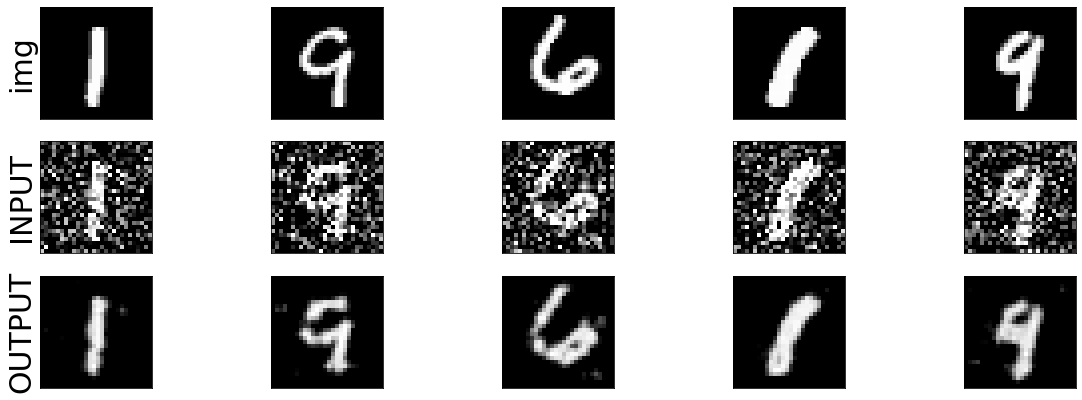

In [14]:
from matplotlib import pyplot as plt
import random
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10),  (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20, 7))

# 이미지 다섯 개를 무작위로 고른다. 
random_images = random.sample(range(output.shape[0]), 5)

# 원본 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test[random_images[i]].reshape(28, 28), cmap='gray')
    if i ==0 : 
        ax.set_ylabel("img", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 노이즈 이미지를 두번째 그린다
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(x_test_noised[random_images[i]].reshape(28, 28), cmap='gray')
    if i ==0 : 
        ax.set_ylabel("INPUT", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 오토 인코더가 출력한 이미지를 아래에 그린다.
for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[random_images[i]].reshape(28,28), cmap='gray')
    if i ==0 : 
        ax.set_ylabel("OUTPUT", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [15]:
# cifar10로 만들어보기

In [16]:
from keras.datasets import cifar10

In [17]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

x_train = (x_train/255)
x_test = (x_test/255)

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
def autoencoder(hidden_layer_size) :
    model = Sequential()
    model.add(Conv2D(filters=hidden_layer_size, kernel_size=(2,2), input_shape=(32,32,3), padding='same'))
    model.add(Conv2D(filters=150, kernel_size=(3,3), padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # model.add(Dropout(0.25))
    model.add(UpSampling2D(size=(2,2)))
#     model.add(Conv2D(filters=500, kernel_size=(3,3), padding='same'))
    model.add(Conv2D(filters=3, kernel_size=(4,4), padding = 'same',activation ='relu'))
    # model.add(MaxPool2D(pool_size=(2,2)))
    # model.add(Dropout(0.2))
    # model.add(Conv2DTranspose(filters=3, kernel_size=(25,25), padding='valid', activation='sigmoid'))
    # model.add(Flatten())
    # model.add(Dense(units=784, activation='sigmoid'))
    return model

model = autoencoder(hidden_layer_size=15)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 15)        195       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 150)       20400     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 150)       0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 32, 32, 150)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 3)         7203      
Total params: 27,798
Trainable params: 27,798
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])  
# layer 쌓은 후 loss : 0.01 -> 0.0023
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) # loss : 0.09

model.fit(x_train, x_train, epochs=3)

output = model.predict(x_test)

Epoch 1/3
50000/50000 [==============================] - 13s 257us/step - loss: 0.0021 - acc: 0.8565
Epoch 2/3
50000/50000 [==============================] - 13s 252us/step - loss: 5.7345e-04 - acc: 0.8931
Epoch 3/3
50000/50000 [==============================] - 12s 250us/step - loss: 5.0104e-04 - acc: 0.9019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


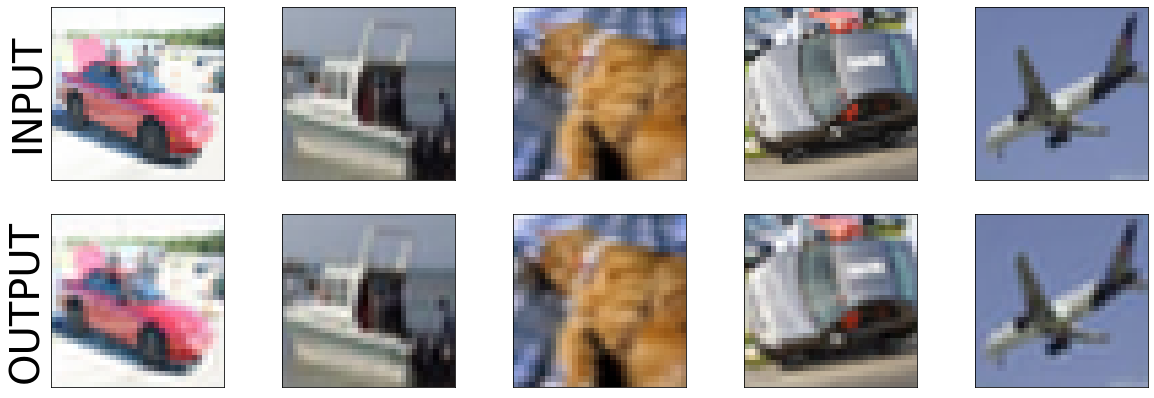

In [25]:
from matplotlib import pyplot as plt
import random
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20, 7))

# 이미지 다섯 개를 무작위로 고른다. 
random_images = random.sample(range(output.shape[0]), 5)

# 원본(입력) 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test[random_images[i]].reshape(32, 32,3))
    if i ==0 : 
        ax.set_ylabel("INPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 오토 인코더가 출력한 이미지를 아래에 그린다.
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[random_images[i]].reshape(32, 32,3))
    if i ==0 : 
        ax.set_ylabel("OUTPUT", size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()